In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold

In [2]:
#Load training features data

train_feat_df = pd.read_csv("train_features.csv").set_index("id")

In [3]:
train_feat_df.describe()

,Tm,Group 1,Group 2,Group 3,Group 4,Group 5,Group 6,Group 7,Group 8,Group 9,...,FP_2038,FP_2039,FP_2040,FP_2041,FP_2042,FP_2043,FP_2044,FP_2045,FP_2046,FP_2047
count,2662.000000,2662.000000,2662.000000,2662.000000,2662.000000,2662.000000,2662.000000,2662.000000,2662.000000,2662.000000,...,2662.000000,2662.000000,2662.000000,2662.000000,2662.000000,2662.000000,2662.000000,2662.000000,2662.000000,2662.000000
mean,278.263452,1.020661,1.582269,0.114951,0.036439,0.036814,0.022915,0.013524,0.010143,0.007137,...,0.006386,0.001127,0.001127,0.002630,0.001878,0.000376,0.004884,0.001503,0.002630,0.003005
std,85.117914,1.353640,3.738416,0.425964,0.208307,0.205516,0.164037,0.118732,0.117480,0.092695,...,0.079673,0.033558,0.033558,0.051222,0.043307,0.019382,0.069725,0.038742,0.051222,0.054748
min,53.540000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,217.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,277.300000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,325.150000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,897.150000,16.000000,42.000000,6.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
train_feat_df.columns

Index(['SMILES', 'Tm', 'Group 1', 'Group 2', 'Group 3', 'Group 4', 'Group 5',
       'Group 6', 'Group 7', 'Group 8',
       ...
       'FP_2038', 'FP_2039', 'FP_2040', 'FP_2041', 'FP_2042', 'FP_2043',
       'FP_2044', 'FP_2045', 'FP_2046', 'FP_2047'],
      dtype='object', length=2501)

### Exploring the distribution of the target variable (TM)

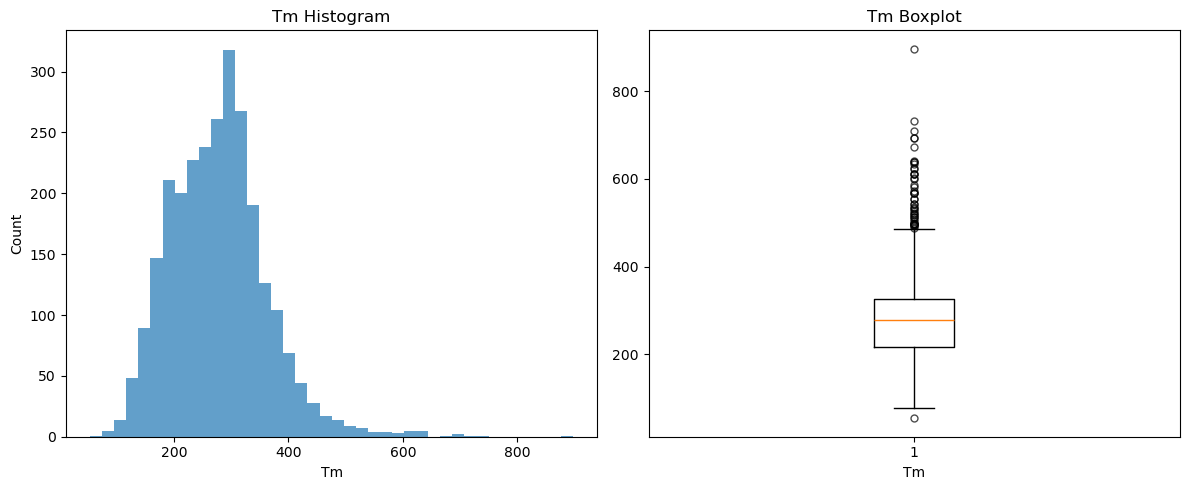

In [5]:
fig, axs = plt.subplots(1,2, figsize = (12, 5))

# --- Left plot: Hist ---
axs[0].hist(train_feat_df["Tm"], bins = 40, alpha = 0.7)
axs[0].set_xlabel("Tm")
axs[0].set_ylabel("Count")
axs[0].set_title("Tm Histogram")

# --- Right plot: Box ---
axs[1].boxplot(train_feat_df["Tm"], flierprops = dict(marker = 'o', markersize = 5, alpha = 0.7))
axs[1].set_xlabel("Tm")
axs[1].set_title("Tm Boxplot")



plt.tight_layout()
plt.show()

#### Box plot shows a long head, with many compounds having mp greater than 75 percentile, want to examine these compounds further

In [6]:
# Isolate the RDKit features in a separate df

RDKit_features_TM = [
    "Tm",
    "MolWt",
    "LogP",
    "TPSA",
    "HBD",
    "HBA",
    "RotB",
    "RingCount",
    "FracCSP3",
    "NumAromaticRings",
    "NumHeteroatoms",
    "BertzCT",
    "Kappa1",
    "Kappa2",
    "Kappa3",
    "Chi1v",
    "LabuteASA",
    "HeavyAtomCount",
    "NumAromaticAtoms",
    "NumAliphaticRings",
    "NumSaturatedRings",
    "NumAromaticHeterocycles",
    "NumAromaticCarbocycles",
    "MolMR",
    "NumN",
    "NumO",
    "NumS",
    "NumHalogen",
]

RDKit_df = train_feat_df[RDKit_features_TM]

In [7]:
## Create a new df for these high-melting compounds, will limit to 90th percentile

train_high_mp = RDKit_df[
    RDKit_df["Tm"] > np.percentile(RDKit_df["Tm"], 90)
]

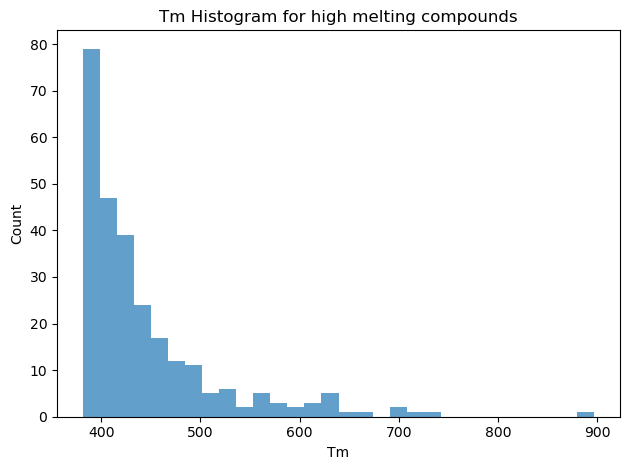

In [8]:
## Plot histogram to see distribution of high melting compounds

plt.hist(train_high_mp["Tm"], bins = 30, alpha = 0.7)
plt.xlabel("Tm")
plt.ylabel("Count")
plt.title("Tm Histogram for high melting compounds")

plt.tight_layout()
plt.show()

#### Want to see if any of the RDKit features are indicitive of the high melting compounds

In [9]:
train_mean_df = RDKit_df.mean().rename("global_mean").to_frame()
high_mp_mean_df = train_high_mp.mean().rename("high_mp_mean").to_frame()

comp_df = pd.concat([train_mean_df, high_mp_mean_df], axis = 1)

comp_df["percent_diff"] = ((comp_df["high_mp_mean"] - comp_df["global_mean"]) / comp_df["global_mean"]) * 100

comp_df = comp_df[np.abs(comp_df["percent_diff"]) > 60]

comp_df = comp_df.sort_values("percent_diff", ascending = False)

comp_df

,global_mean,high_mp_mean,percent_diff
NumN,0.348234,0.726592,108.650190
NumAromaticCarbocycles,0.541322,1.123596,107.564971
NumAromaticRings,0.619083,1.273408,105.692520
RingCount,0.793764,1.588015,100.061329
NumAromaticAtoms,3.541698,7.041199,98.808553
NumAromaticHeterocycles,0.077761,0.149813,92.657729
BertzCT,173.969640,328.146174,88.622667
HBD,0.367017,0.689139,87.767338
NumAliphaticRings,0.174681,0.314607,80.103902
NumSaturatedRings,0.129226,0.213483,65.201202


### Exploring the relationships between some RDKit features and the target MP

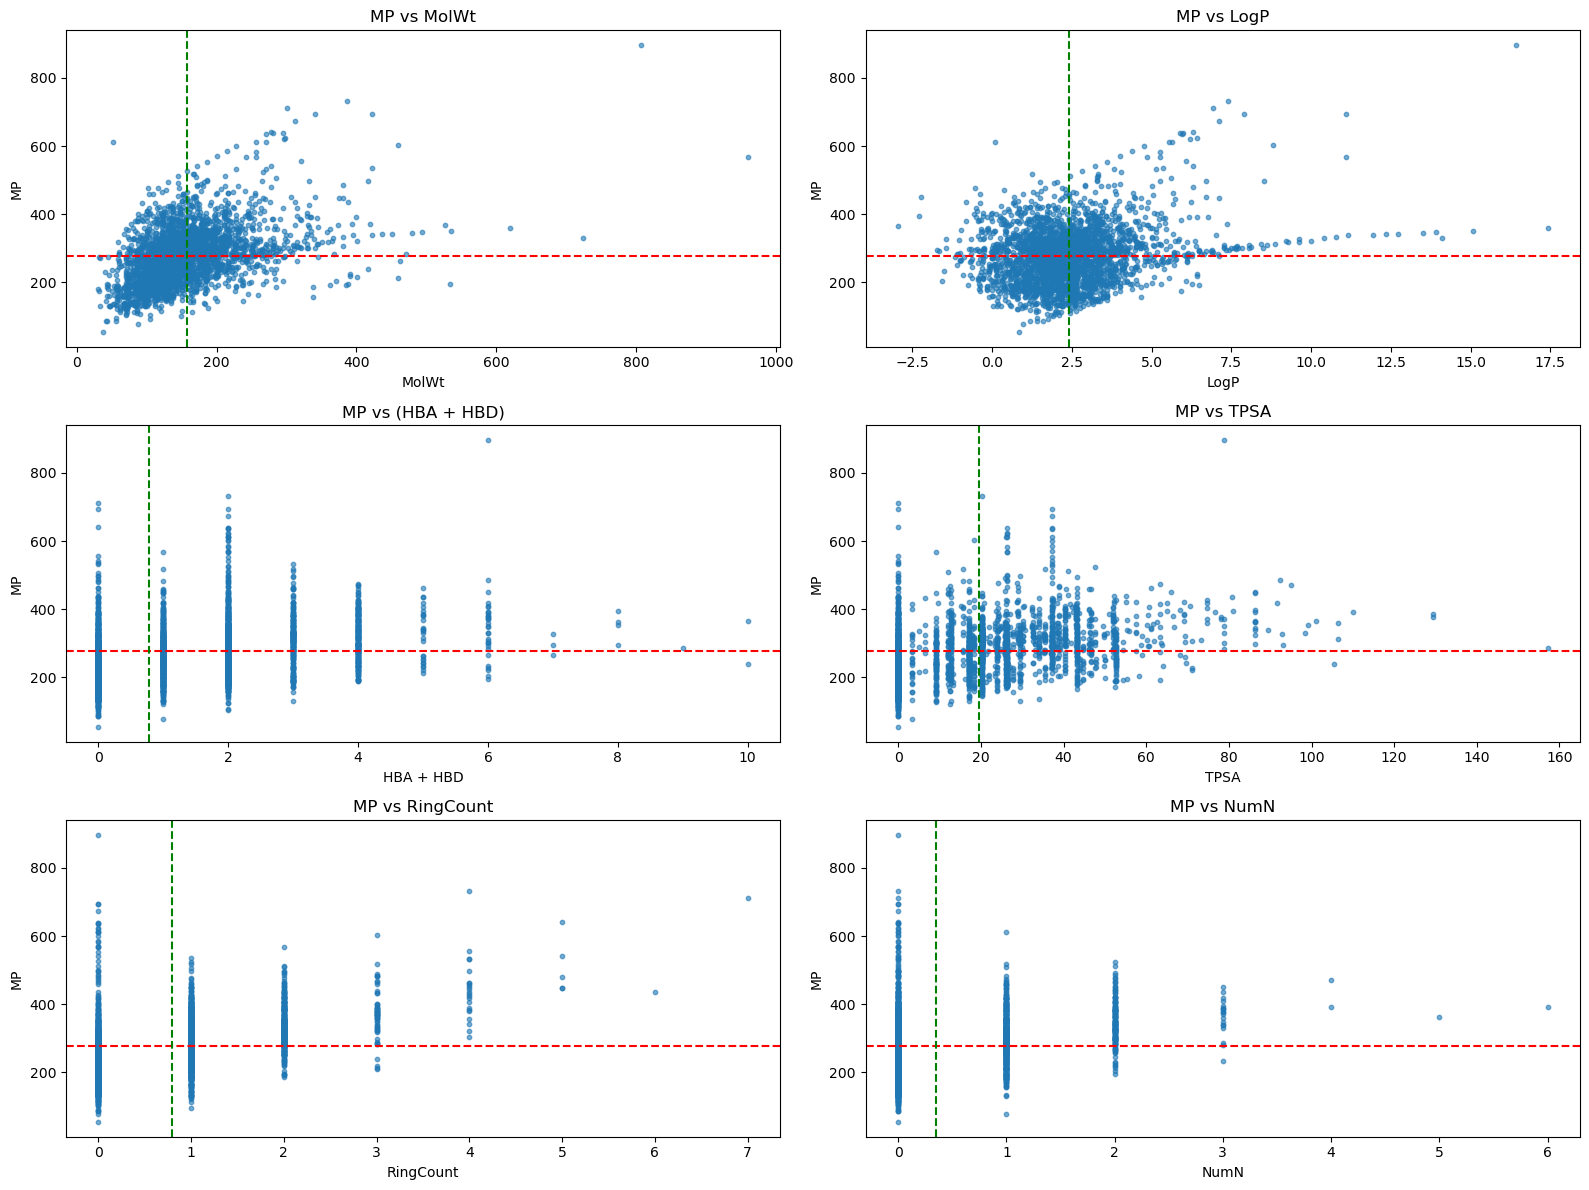

In [11]:
fig, axs = plt.subplots(3, 2, figsize=(16, 12))


mean_tm = train_feat_df["Tm"].mean()

# --- Top Left plot: MolWt vs Tm ---
axs[0,0].scatter(train_feat_df["MolWt"], train_feat_df["Tm"], s=10, alpha=0.6)


axs[0,0].axhline(mean_tm, color='red', linestyle='--')
axs[0,0].axvline(train_feat_df["MolWt"].mean(), color='green', linestyle='--')

axs[0,0].set_xlabel("MolWt")
axs[0,0].set_ylabel("MP")
axs[0,0].set_title("MP vs MolWt")


# --- Top Right plot: LogP vs Tm ---
axs[0,1].scatter(train_feat_df["LogP"], train_feat_df["Tm"], s=10, alpha=0.6)

axs[0,1].axhline(mean_tm, color='red', linestyle='--')
axs[0,1].axvline(train_feat_df["LogP"].mean(), color='green', linestyle='--')

axs[0,1].set_xlabel("LogP")
axs[0,1].set_ylabel("MP")
axs[0,1].set_title("MP vs LogP")


# --- Middle Left plot: HBA + HBD vs TM ---
axs[1,0].scatter((train_feat_df["HBA"] + train_feat_df["HBD"]), train_feat_df["Tm"], s=10, alpha=0.6)

axs[1,0].axhline(mean_tm, color='red', linestyle='--')
axs[1,0].axvline(
    ((train_feat_df["HBA"].mean() + train_feat_df["HBD"].mean()) / 2),
     color='green', linestyle='--')

axs[1,0].set_xlabel("HBA + HBD")
axs[1,0].set_ylabel("MP")
axs[1,0].set_title("MP vs (HBA + HBD)")


# --- Middle Right plot: TPSA vs TM ---
axs[1,1].scatter(train_feat_df["TPSA"], train_feat_df["Tm"], s=10, alpha=0.6)

axs[1,1].axhline(mean_tm, color='red', linestyle='--')
axs[1,1].axvline(train_feat_df["TPSA"].mean(), color='green', linestyle='--')

axs[1,1].set_xlabel("TPSA")
axs[1,1].set_ylabel("MP")
axs[1,1].set_title("MP vs TPSA")


# --- Bottom Left plot: Ring count vs Tm ---
axs[2,0].scatter(train_feat_df["RingCount"],train_feat_df["Tm"], s=10, alpha=0.6)

axs[2,0].axhline(mean_tm, color='red', linestyle='--')
axs[2,0].axvline(train_feat_df["RingCount"].mean(), color='green', linestyle='--')

axs[2,0].set_xlabel("RingCount")
axs[2,0].set_ylabel("MP")
axs[2,0].set_title("MP vs RingCount")


# --- Bottom Left plot: NumN vs Tm ---
axs[2,1].scatter(train_feat_df["NumN"],train_feat_df["Tm"], s=10, alpha=0.6)

axs[2,1].axhline(mean_tm, color='red', linestyle='--')
axs[2,1].axvline(train_feat_df["NumN"].mean(), color='green', linestyle='--')

axs[2,1].set_xlabel("NumN")
axs[2,1].set_ylabel("MP")
axs[2,1].set_title("MP vs NumN")


plt.tight_layout()
plt.show()

### Want to see how the RDkit features are correclted to each other, and to the target variable, for feature selection

In [12]:
corr = RDKit_df.corr(numeric_only=True)

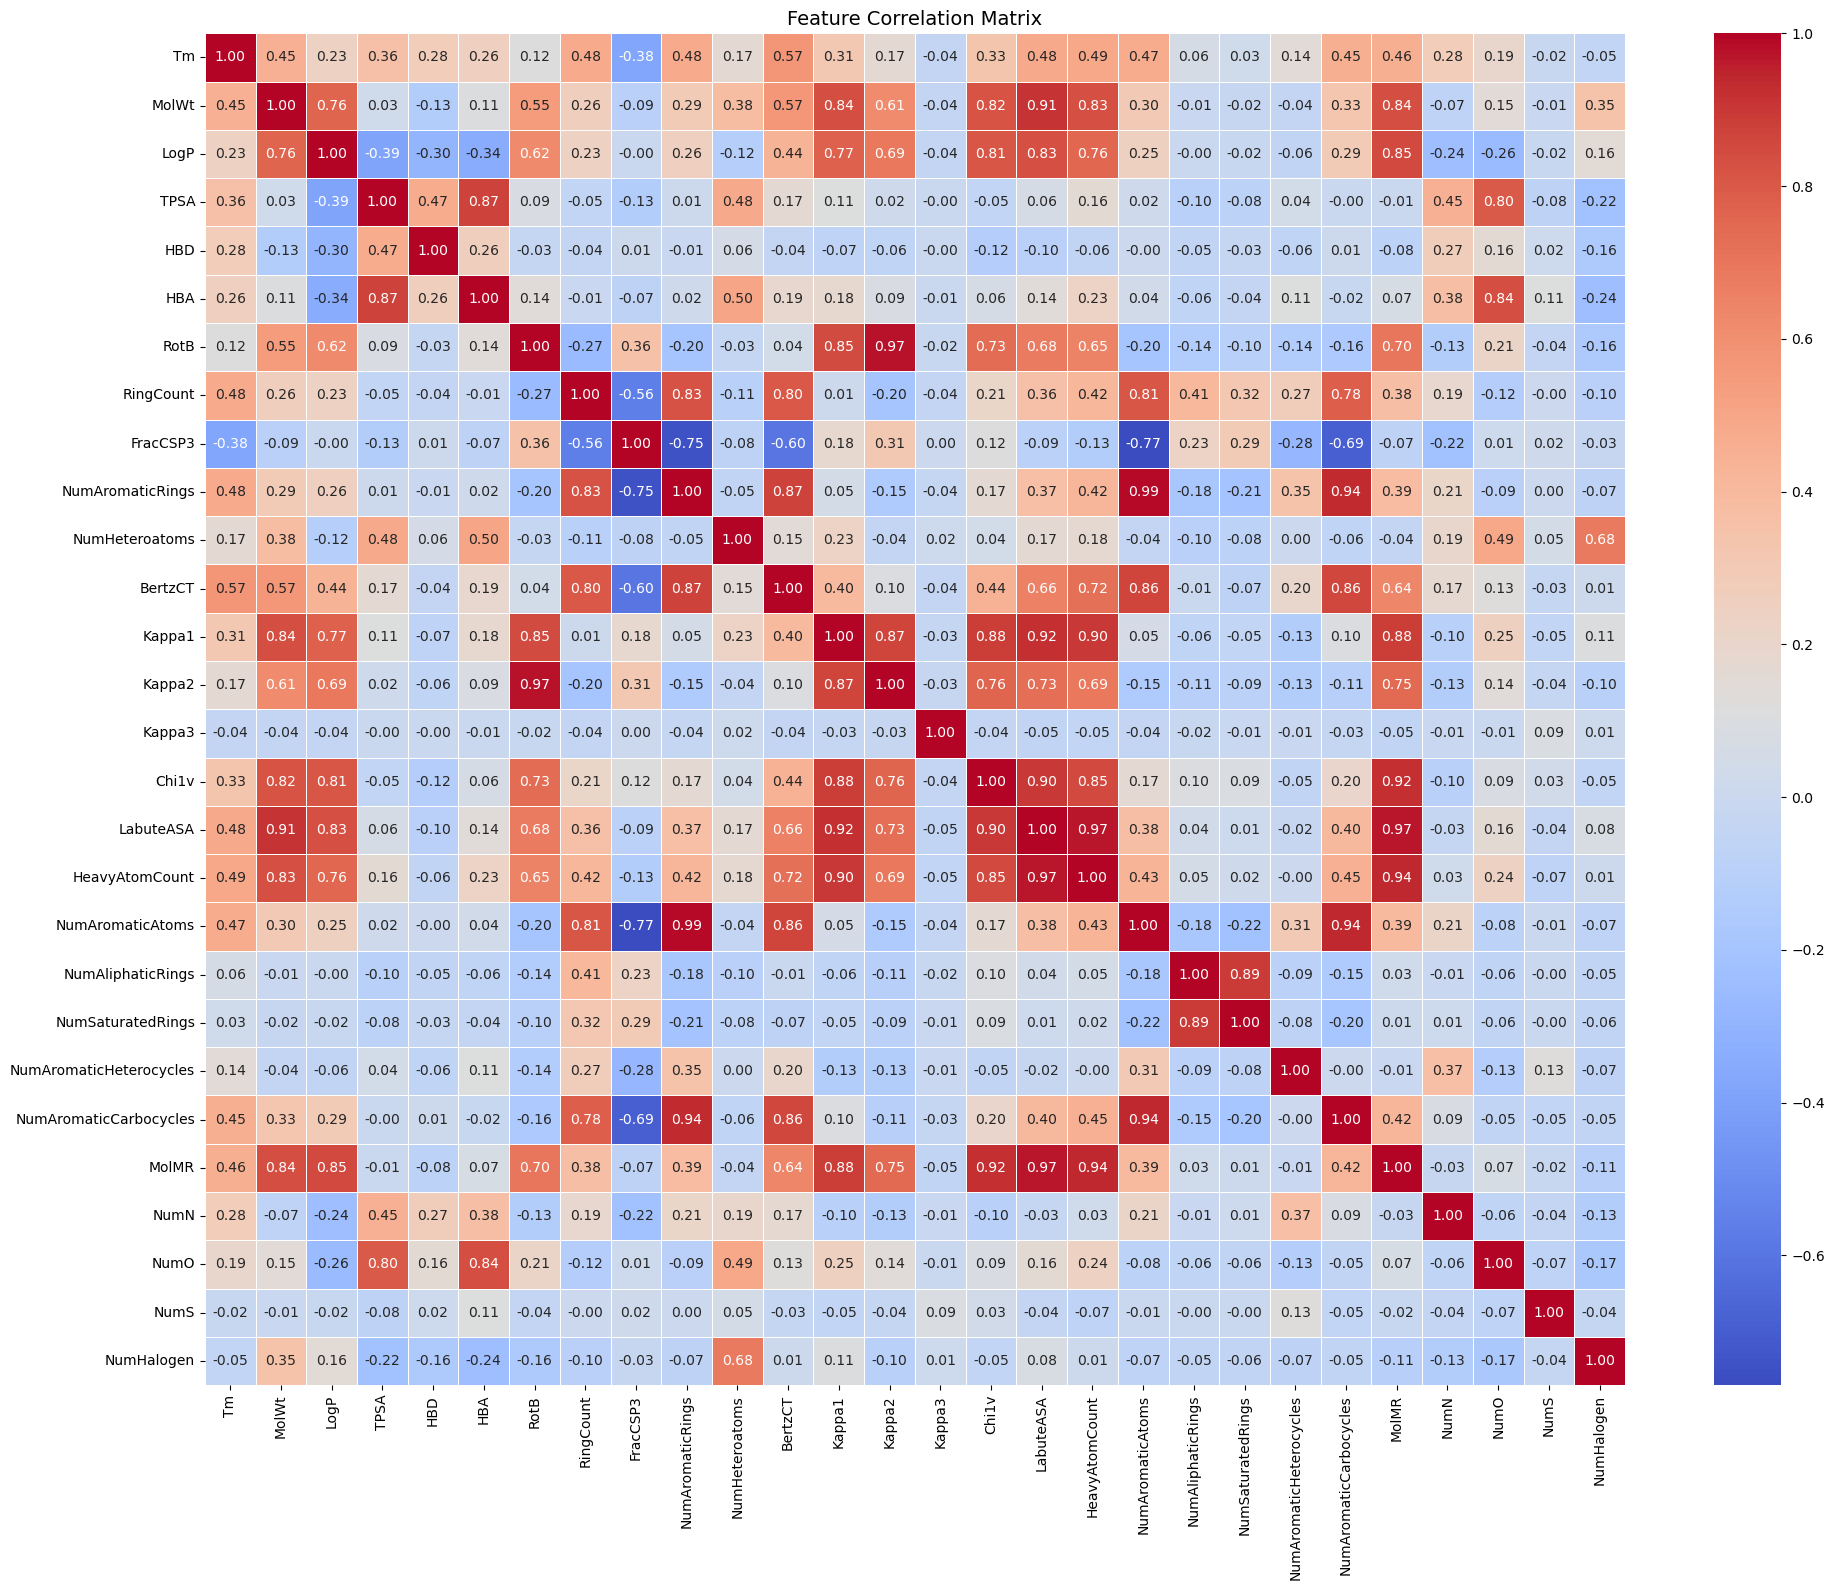

In [13]:
plt.figure(figsize=(20, 16))
sns.heatmap(
    corr,
    annot=True,             
    cmap="coolwarm",       
    linewidths=0.5,         
    fmt=".2f"               
)
plt.title("Feature Correlation Matrix", fontsize=14)
plt.tight_layout()
plt.show()

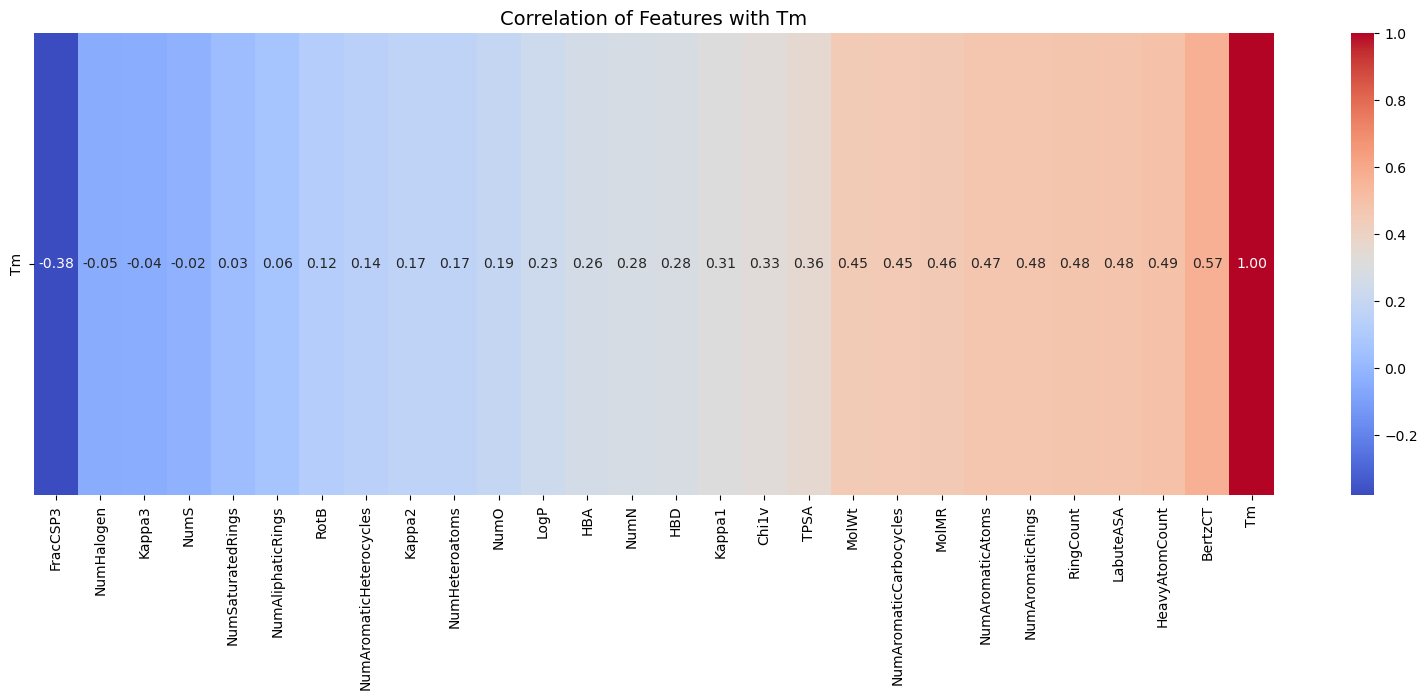

In [14]:
target_corr = corr["Tm"].sort_values()

plt.figure(figsize=(20, 6))
sns.heatmap(
    target_corr.to_frame().T,
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)
plt.title("Correlation of Features with Tm", fontsize=14)
plt.show()

#### Identify features with high correlation to each other, then drop these features
#### Want to only drop the item in the pair either if it appears in multiple pairs, or has the lower correlation to the target variable

In [16]:
# A. Build redundant pair table 
rows = []
for i in corr.columns:
    for j in corr.columns:
        if i < j and abs(corr.loc[i, j]) > 0.85:
            rows.append({
                "Item_1": i,
                "Item_2": j,
                "Item_1_TM_cor": corr.loc[i, "Tm"],
                "Item_2_TM_cor": corr.loc[j, "Tm"],
                "Item_1_Item_2_corr": corr.loc[i, j]
            })

redundant_pairs_df = pd.DataFrame(rows)

# B. Count frequency of appearance across all pairs
Item_count = pd.concat(
    [redundant_pairs_df["Item_1"], redundant_pairs_df["Item_2"]],
    ignore_index=True
).value_counts()

# C. Define selection logic
def choose_worse(row):
    i = row["Item_1"]
    j = row["Item_2"]
    
    # Rule A – choose the one that appears in more redundant pairs
    if Item_count[i] > Item_count[j]:
        return i
    if Item_count[j] > Item_count[i]:
        return j
    
    # Rule B – if tie, choose the one less correlated with MP
    if abs(row["Item_1_TM_cor"]) < abs(row["Item_2_TM_cor"]):
        return i
    else:
        return j

# D. Apply logic
redundant_pairs_df["drop"] = redundant_pairs_df.apply(choose_worse, axis=1)

# E. Final list of features to drop
features_to_drop = sorted(redundant_pairs_df["drop"].unique())

print(features_to_drop)

['HBA', 'Kappa1', 'Kappa2', 'LabuteASA', 'MolMR', 'NumAromaticAtoms', 'NumAromaticCarbocycles', 'NumAromaticRings', 'NumSaturatedRings']


#### Define a function to drop the redundant features (will also call this for the test data)

In [41]:
def drop_redundant(df):
    return df.drop(columns=features_to_drop)

In [42]:
train_feat_df = pd.read_csv("train_features.csv").set_index("id")
train_feat_df = drop_redundant(train_feat_df)
train_feat_df.shape

(2662, 2492)

In [43]:
# Drop reduncant features of testing data (defined from training data)

test_feat_df = pd.read_csv("test_features.csv").set_index("id")
test_feat_df = drop_redundant(test_feat_df)
test_feat_df.shape

(666, 2491)

#### Remove extreme outliers from the training data

In [44]:
train_feat_df["Tm"].quantile([0.001, 0.999])

0.001     87.0703
0.999    699.0147
Name: Tm, dtype: float64

In [45]:
q1, q99 = train_feat_df["Tm"].quantile([0.005, 0.995])
train_feat_df = train_feat_df[(train_feat_df["Tm"] > q1) & (train_feat_df["Tm"] < q99)]

In [46]:
train_feat_df.shape

(2634, 2492)

### Look at the generated fingerprint and group data, and reduce the number of features

In [47]:
fp_cols = [c for c in train_feat_df.columns if c.startswith("FP")] 
count_fp_cols = train_feat_df[fp_cols].sum(axis = 0)
freq_fp = count_fp_cols / len(train_feat_df)

#Want to drop finger prints that are either too rare, or too common
min_freq_fp = 0.03
max_freq_fp = 0.7


group_cols = [c for c in train_feat_df.columns if c.startswith("Group")]
group_presence = (train_feat_df[group_cols] > 0).astype(int)
count_group_cols = group_presence.sum(axis=0)
freq_group = count_group_cols / len(train_feat_df)

#Same for groups
min_freq_group = 0.03
max_freq_group = 0.7

keep_group_cols = freq_group[(freq_group >= min_freq_group) & (freq_group <= max_freq_group)].index
keep_fp_cols = freq_fp[(freq_fp >= min_freq_fp) & (freq_fp <= max_freq_fp)].index

other_cols = [
    c for c in train_feat_df.columns
    if not (c.startswith("FP") or c.startswith("Group"))
]

keep_cols = list(keep_fp_cols) + list(keep_group_cols) + other_cols

def reduce_features(df):
    
    available_keep_cols = [c for c in keep_cols if c in df.columns]

    extra_other_cols = [
        c for c in df.columns
        if (not c.startswith("FP"))
        and (not c.startswith("Group"))
        and c not in available_keep_cols
    ]

    final_cols = available_keep_cols + extra_other_cols

    return df[final_cols]

In [48]:
len(keep_fp_cols), len(keep_group_cols), len(other_cols)

(85, 31, 20)

In [49]:
train_feat_df = reduce_features(train_feat_df)

In [50]:
train_feat_df.shape

(2634, 136)

In [51]:
test_feat_df = reduce_features(test_feat_df)

In [52]:
test_feat_df.shape

(666, 135)

#### Export refined testing and training data

In [53]:
train_feat_df.to_csv("refined_training_data.csv", index = True)
test_feat_df.to_csv("refined_testing_data.csv", index = True)